In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("I:\\AI and ML Project\\New 2\\sales_dataset.csv")
df.head()

,Date,Day_of_Week,Is_Weekend,Is_Holiday,Store_Closed,Sales
0,1/1/2024,Monday,False,False,0,11181
1,1/2/2024,Tuesday,False,False,0,9214
2,1/3/2024,Wednesday,False,False,0,12931
3,1/4/2024,Thursday,False,False,0,10904
4,1/5/2024,Friday,False,False,0,8908


In [3]:
from sklearn.preprocessing import LabelEncoder 

In [4]:
lb = LabelEncoder()

In [5]:
df['Is_Weekend'] = lb.fit_transform(df['Is_Weekend'])
df['Is_Holiday'] = lb.fit_transform(df['Is_Holiday'])

In [6]:
df.sample(5)

,Date,Day_of_Week,Is_Weekend,Is_Holiday,Store_Closed,Sales
109,4/19/2024,Friday,0,0,0,12099
71,3/12/2024,Tuesday,0,0,0,10354
116,4/26/2024,Friday,0,0,0,14432
17,1/18/2024,Thursday,0,0,0,10634
55,2/25/2024,Sunday,1,0,0,16904


In [7]:
day_mapping = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7}
df['Day_of_Week'] = df['Day_of_Week'].map(day_mapping)

In [8]:
df.sample(5)

,Date,Day_of_Week,Is_Weekend,Is_Holiday,Store_Closed,Sales
18,1/19/2024,6,0,0,0,11010
90,3/31/2024,1,1,0,0,16685
63,3/4/2024,2,0,0,0,9701
15,1/16/2024,3,0,0,0,14896
23,1/24/2024,4,0,0,0,13116


In [9]:
df.drop('Date', axis=1, inplace=True)

In [10]:
#Feature and Target
X = df.drop('Sales', axis=1)  
y = df['Sales']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Linear Regression 

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr_predictions = lr.predict(X_test)

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y_test, lr_predictions)

0.7863653652604913

# Random Forest Algorithm 

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
rf = RandomForestRegressor()

In [21]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
rf_predictions = rf.predict(X_test)

In [23]:
r2_score(y_test, rf_predictions)

0.7677256558041642

# Plot 

### train data and test data with actual data 

In [24]:
import matplotlib.pyplot as plt

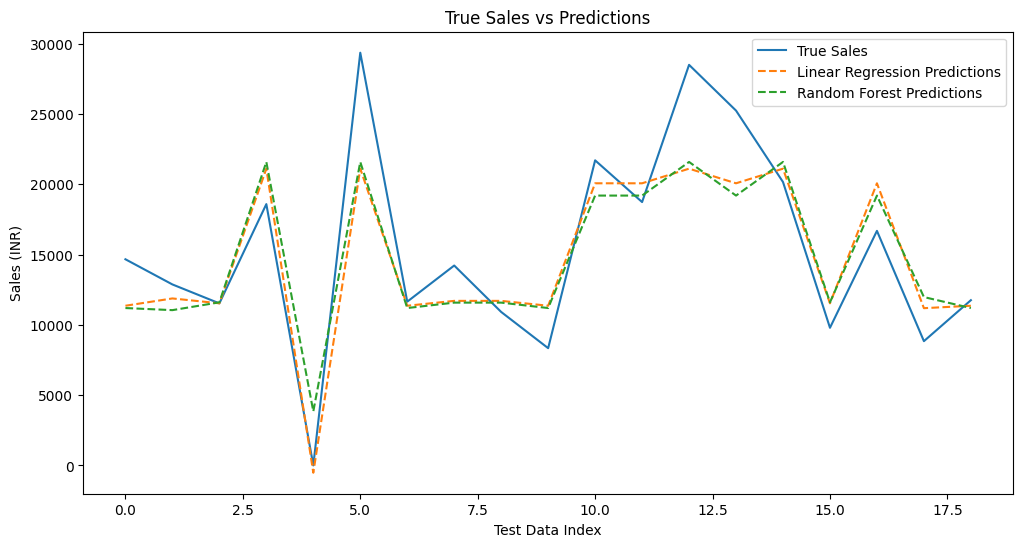

In [25]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='True Sales')
plt.plot(lr_predictions, label='Linear Regression Predictions', linestyle='dashed')
plt.plot(rf_predictions, label='Random Forest Predictions', linestyle='dashed')
plt.title("True Sales vs Predictions")
plt.xlabel("Test Data Index")
plt.ylabel("Sales (INR)")
plt.legend()
plt.show()

### Predict for next day 

In [27]:
print("\nEnter the features for the next day to predict sales:")

day_of_week = input("\nEnter the day of the week (e.g., Sunday, Monday): ")
is_weekend = int(input("Is it a weekend? Enter 1 for Yes, 0 for No: "))
is_holiday = int(input("Is it a holiday? Enter 1 for Yes, 0 for No: "))
store_closed = int(input("Is the store closed? Enter 1 for Yes, 0 for No: "))


Enter the features for the next day to predict sales:



Enter the day of the week (e.g., Sunday, Monday):  Monday
Is it a weekend? Enter 1 for Yes, 0 for No:  0
Is it a holiday? Enter 1 for Yes, 0 for No:  0
Is the store closed? Enter 1 for Yes, 0 for No:  0


In [28]:
input_data = pd.DataFrame({
    'Day_of_Week': [day_of_week],
    'Is_Weekend': [is_weekend],
    'Is_Holiday': [is_holiday],
    'Store_Closed': [store_closed]
})

In [29]:
input_data['Day_of_Week'] = input_data['Day_of_Week'].map(day_mapping)

In [30]:
# Linear Regression Prediction 
lr_prediction = lr.predict(input_data)[0]

In [31]:
print(f"\nPredicted Sales for the next day using Linear Regression: {lr_prediction:.2f} INR")


Predicted Sales for the next day using Linear Regression: 11184.82 INR


In [32]:
# Random forest Prediction 
rf_prediction = rf.predict(input_data)[0]

In [33]:
print(f"Predicted Sales for the next day using Random Forest: {rf_prediction:.2f} INR")

Predicted Sales for the next day using Random Forest: 11975.07 INR
